# Day 19 In-Class Assignment: Compartmental Modeling, moving from the model to the code
___

### <p style="text-align: right;"> &#9989; Andrew.</p>

#### <p style="text-align: right;"> &#9989; Names of Group Members.</p>

**Make to execute this cell so that you have the imports that you need!**

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline
import matplotlib.pyplot as plt

## Background
___

Previously, you explored three compartmental models. Today, you will build one of those in detail.

You won't be too surprised to learn that clever researchers have explored all of the models we explored, and some standard models have emerged. Many researchers take these simple versions as starting points and build more complex models from them. **That is what *you* will do today.** 

Depending on which group you chose or were assigned to, read the description below for your model. You will learn a little about the standard model, what the logic is behind it, and what it typically tells us. Then, you will extend that model to answer some specific questions. At the end of class your group will **present a slide (or two) of your model and your findings**.

One of the things you won't know as you extend the model is the value of the parameters. In general we don't know the value of the parameters; in fact, often it is the purpose of building the model to find the parameters from data. Leave the parameters as variables in your code that you can vary. You might be able to come up with a reasonable guess, and then you can run your model for values around that good guess. Write your code so that this is easy to do: you might want to make a plot with $10$ to $100$ different runs for the basic model as the parameters are varied. (Or not, depends on what you do with your model.) Similarly, you won't know the initial conditions; again, make those variables that you can vary to explore the performance of the model.

___
### Creating your Slide(s)
___

Will create your group's slides in the Google Slides or OneDrive Powerpoint file shared with you by your instructor on slide labeled with your group/table number. **You should work collaboratively as a group** to add text and figures and so that everyone will have access to your results.

In your slide(s), you should cover:

* Which model did your group consider?
* What is the basic model used for this class of problems? 
* Show an example of what the model gives in its most basic form.
* Show how compartments are connected through transitions (one thing becomes another) and through influence (a compartment changes the rate at which things happen). 
* Give a conclusion on what you learned and what you think could be learned if the model were developed further. 

#### At the end, you will save a copy of the slides and **you will be submitting the slides with your assignment to D2L**
___
### Organization
___

Before you get started, you should probably try to organize your group. You might assign one person to be in charge of managing the slides for your group so that they can be filled in as you go along. You don't want to wait until the end to figure out how to put a figure into the presentation!  

___
## Ecology: The Lotka-Volterra Model
___

<img src="https://museum.wa.gov.au/sites/default/files/imagecache/wam_v2_page_full/news-images/Planet%20Shark%20Predator%20or%20Prey.%20Courtesy%20Grande%20Exhibitions_0.jpg" width=400px>

Ecologists have explored predator-prey situations in the context of many obvious examples (foxes and rabbits); but the model itself can also be used to explore competition between companies, chemical reactions, among many other examples. The most famous predator-prey model is the [**Lotka-Volterra**](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) model, and it can be expressed most simply as a two-compartment model with, you guessed it, predators and prey. The simple version you will start with can be described in words as:

* The prey breed at some rate that is proportional to the current population of prey. 
* The prey are removed through interactions with the predators.
* The predator population grows through interactions with the prey.
* The predators die at some rate (which includes everything from old age, disease, etc.) in proportion to their current population. 

In this compartmental model, we can use  $p$ and ${\cal P}$ to represent the prey and predator populations, respectively.

**Write down the ODEs for the Predator-Prey model using the code given below**. Discuss why the terms in the equations have the form them do. These equations have an amazingly rich set of solutions!

You can learn more about the model [here](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).

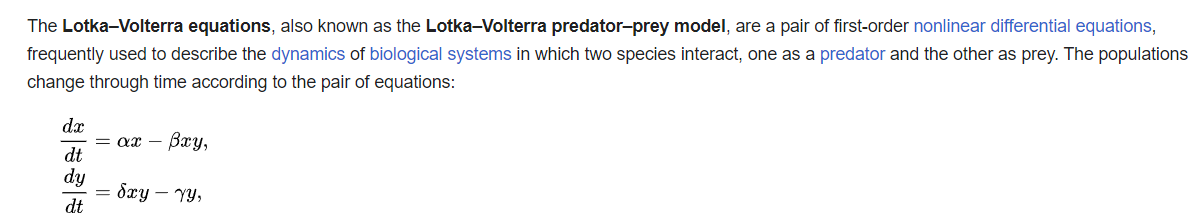

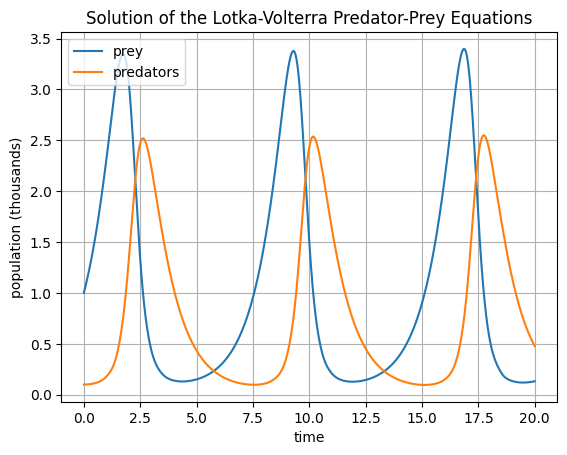

Text(0.5, 1.0, 'Predators vs Prey Phase Space Diagram')

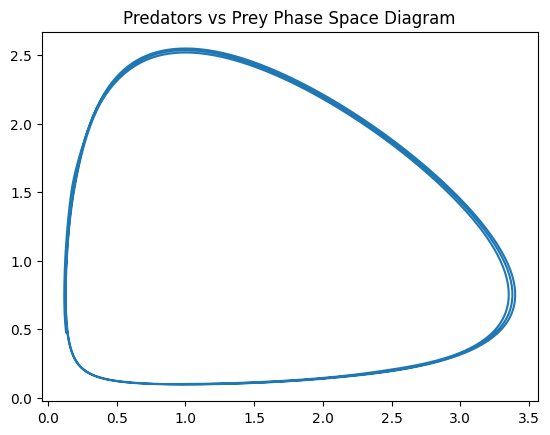

In [3]:
# Predator-Prey Equations


def LV(time, current_state, alpha, beta, delta, gamma):
    
    prey = current_state[0]
    predators = current_state[1]
    
    dprey_dt = alpha*prey - beta*prey*predators
    dpredators_dt = delta*prey*predators - gamma*predators
    
    return [dprey_dt, dpredators_dt]

alpha = 1
beta = 4/3
delta = 1
gamma = 1
initial_conditions = [1,.1]
time = np.linspace(0,20,1000)

result = solve_ivp(LV, (0,20),initial_conditions, t_eval = time, args=(alpha, beta, delta, gamma))

prey = result.y[0,:]
predators = result.y[1,:]

plt.plot(time, prey, label='prey')
plt.plot(time, predators, label='predators')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('population (thousands)')
plt.title('Solution of the Lotka-Volterra Predator-Prey Equations')
plt.show()

plt.plot(prey, predators)
plt.title('Predators vs Prey Phase Space Diagram')

Using the code above, vary the parameters in the model to get a sense for the different behaviors the basic LV model gives. Discuss the basic behavior in your presentation. Are there values of the parameters for which there are qualitatively different types of solutions? Also, discuss this. Make several plots, such as a quad subplot, to show this. Include in your plots the populations versus time _and_ phase portraits (plotting one population versus the other, rather than time.) 

Now that you have the sense for how a standard predator-prey model works, let's modify it. Stop and think about the LV model: is this the model you would have come up with? What would your model have looked like? For example, suppose there are no predators, what happens? 

Let's explore that a bit. If we have an equation of the form
$$ \frac{dp}{dt} = \alpha p,$$

we get exponential growth; this can't continue in this way. Modify your model to include a new term of the form
$$ \frac{dp}{dt} = \alpha p\left(1 - \frac{p}{p_{max}} \right),$$

where $p_{max}$ is called the "carrying capapacity". (You will modify your full code to include this modification.) Describe what it is doing mathematically and explore solutions of the model as you vary the carry capacity. Does this change the nature of the solutions you get? (Vary the parameters again to explore the possible range of solutions: do the populations ever die away? Do you always get oscillating solutions?) 

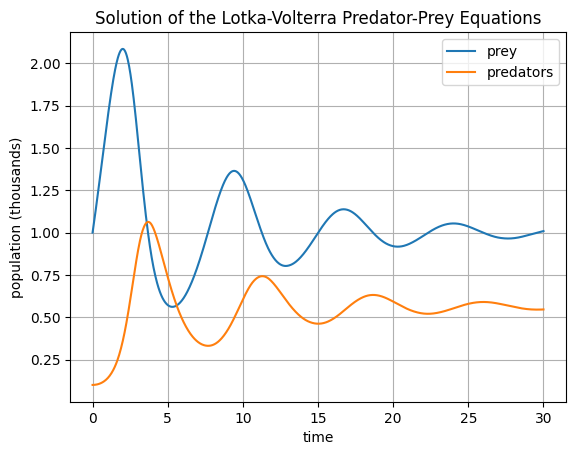

Text(0, 0.5, 'Prey population (thousands)')

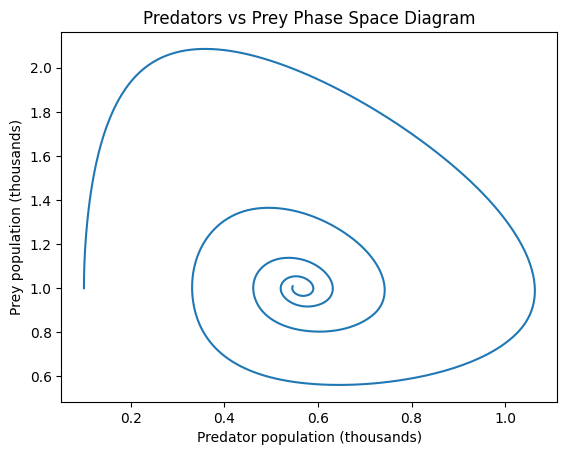

In [12]:
def LVnew(time, current_state, alpha, beta, delta, gamma, pcap):
    
    prey = current_state[0]
    predators = current_state[1]
    
    dprey_dt = alpha*prey*(1-prey/pcap) - beta*prey*predators
    dpredators_dt = delta*prey*predators - gamma*predators
    
    return [dprey_dt, dpredators_dt]

alpha = 1
beta = 4/3
delta = 1
gamma = 1
pcap = 4
initial_conditions = [1,.1]
time = np.linspace(0,30,1000)

result = solve_ivp(LVnew, (0,30),initial_conditions, t_eval = time, args=(alpha, beta, delta, gamma,pcap))

prey = result.y[0,:]
predators = result.y[1,:]

plt.plot(time, prey, label='prey')
plt.plot(time, predators, label='predators')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('population (thousands)')
plt.title('Solution of the Lotka-Volterra Predator-Prey Equations')
plt.show()

plt.plot(predators,prey)
plt.title('Predators vs Prey Phase Space Diagram')
plt.xlabel('Predator population (thousands)')
plt.ylabel('Prey population (thousands)')

___
## Social Science: The Daley-Kendall Model
___
<img src="http://www.thatsnonsense.com/wp-content/uploads/2012/01/rumours.jpg" width=400px>

The flow of information through society impacts all of us, whether it be through malicious rumors about us, government propaganda, or fake news cites attempting to influence the government. Daley and Kendall formulated a basic model for the spread of rumors that we can build new models from. Their model has three compartments:
1. Ignorants (I): these are people ignorant of the rumor. 
2. Spreaders (S): these are people actively spreading the rumor.
3. Stiflers (R): there are people who are bored with the rumor.

More interesting than the compartments of the models are the rules in which they interact:
$$I + S \to S + S,$$
$$S + S \to S + R,$$
$$R + S \to R + R.$$

Think through these rules and how you would convert them into an ODE model. Look at the code below and compare with these transitions; do you see how the rules of the model became these ODEs? **Write down the ODE model for the DK model based on the code below**.

You can learn more about the model [here](https://en.wikipedia.org/wiki/Rumor_spread_in_social_network).

<class 'scipy.integrate._ivp.ivp.OdeResult'>


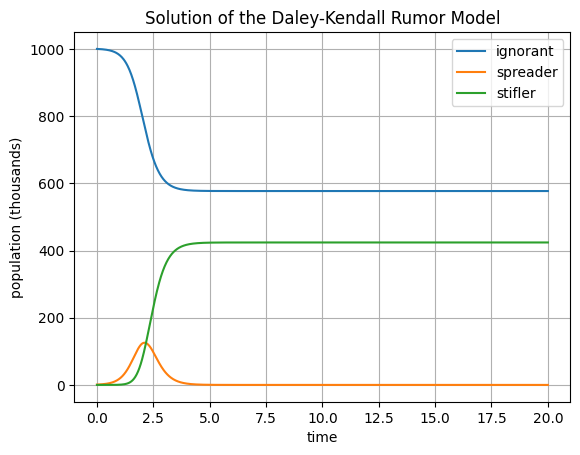

In [5]:
# Daley-Kendall Rumor Model

def DK(time, current_state, alpha, beta):
    
    ignorant = current_state[0]
    spreader = current_state[1]
    stifler = current_state[2]
    
    dignorant_dt = -beta*ignorant*spreader
    dspreader_dt = beta*ignorant*spreader - alpha*spreader*(spreader + stifler)
    dstifler_dt = alpha*spreader*(spreader + stifler)
    
    return [dignorant_dt, dspreader_dt, dstifler_dt]

alpha = 0.01
beta = 0.003

initial_conditions = [1000,1,0]
time = np.linspace(0,20,1000)

result = solve_ivp(DK, (0,20), initial_conditions, t_eval = time, args=(alpha, beta))

print(type(result))
ignorant = result.y[0,:]
spreader = result.y[1,:]
stifler = result.y[2,:]

plt.plot(time, ignorant, label='ignorant')
plt.plot(time, spreader, label='spreader')
plt.plot(time, stifler, label='stifler')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('population (thousands)')
plt.title('Solution of the Daley-Kendall Rumor Model')
plt.show()

Next, vary the parameters of the model to see what behaviors you find; build your intuition for the model. Make several plots to show this behavior, including phase portraits (plot one variable versus another, rather than time).

Now, you are going to modify the model to model [fake news](https://en.wikipedia.org/wiki/Fake_news_website). Suppose you wish to create a website that sells lots of advertising and an election is coming up. Further suppose that there are two candidates running for office. You want to model this in advance to understand better how the dynamics will play out. Modify the model in these ways:
* Assume there are two populations of voters, one for each candidate.
* When you start a rumor, one voting population converts to the other. 

Build, code and explore (with plots) this basic model. 

Modify the model to include these behaviors:
* As people get bored with the latest rumor, some of them transition back to their original beliefs. Modify the model so that rather than becoming a stifler in the new compartment, they *eventually* transition back to being an ignorant in the original compartment. Explore this model by coding it and making plots. 
* While one can possibly sells a lot of ads this way, consider the case where the source is another government attempting to meddle in the election. They are not interested in making money, but impacting the outcome - timing is everything. Use your model to advise the nefarious government on the optimal strategy to influence the election in the most subtle way (you don't want people to notice that there is suddenly an enormous amount of fake news immediately before the election). 

In your presentation, be sure to include many plots for variants of the models to prove your points. 

<class 'scipy.integrate._ivp.ivp.OdeResult'>


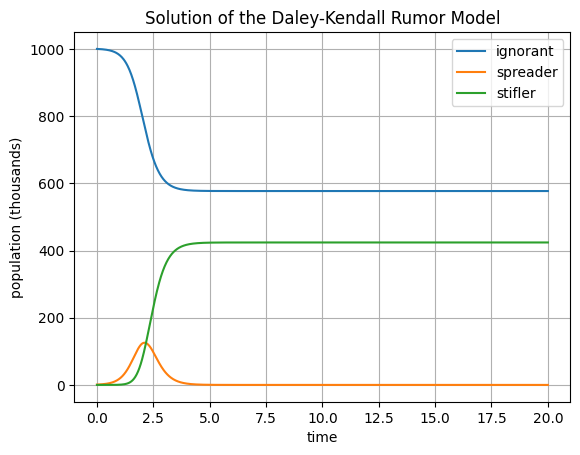

In [6]:
def DKnew(time, current_state, alpha, beta):
    
    ignorant = current_state[0]
    spreader = current_state[1]
    stifler = current_state[2]
    
    dignorant_dt = -beta*ignorant*spreader
    dspreader_dt = beta*ignorant*spreader - alpha*spreader*(spreader + stifler)
    dstifler_dt = alpha*spreader*(spreader + stifler)
    
    return [dignorant_dt, dspreader_dt, dstifler_dt]

alpha = 0.01
beta = 0.003

initial_conditions = [1000,1,0]
time = np.linspace(0,20,1000)

result = solve_ivp(DKnew, (0,20), initial_conditions, t_eval = time, args=(alpha, beta))

print(type(result))
ignorant = result.y[0,:]
spreader = result.y[1,:]
stifler = result.y[2,:]

plt.plot(time, ignorant, label='ignorant')
plt.plot(time, spreader, label='spreader')
plt.plot(time, stifler, label='stifler')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('population (thousands)')
plt.title('Solution of the Daley-Kendall Rumor Model')
plt.show()


___
## Health: The SIR Model
___

<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-19/spread_clipart.png" width=400px>

There are a wide range of infectious disease models, as many as there are diseases, their variants and strategies to control them. However, the starting point for modeling many infectious diseases is the SIR model, which can be understood as:  

- **S**: people susceptible to the disease (number of people who can get it) 
- **I**: those who are infectious with the disease (can spread it) 
- **R**: people recovered from the disease (they are well and not spreading) 

**Write down the ODEs for the SIR model using the code given below**. Discuss why the terms in the equations have the form them do. 

You find out more about the model [here](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model).

Text(0.5, 1.0, 'Solution of the SIR Model')

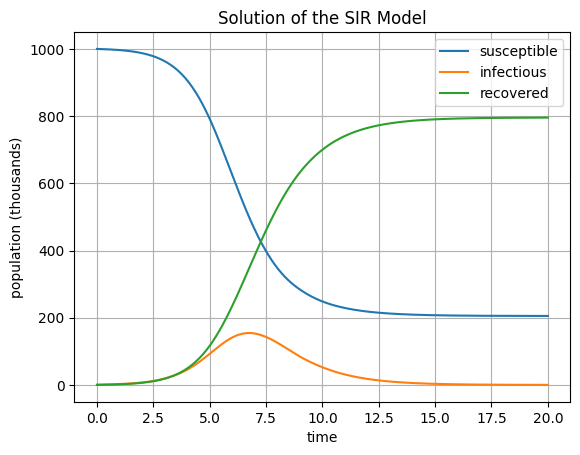

In [7]:
# SIR Model

def SIR(time, current_state, beta, gamma):
    
    susceptible = current_state[0]
    infectious = current_state[1]
    recovered = current_state[2]
    
    dsusceptible_dt = -beta*susceptible*infectious
    dinfectious_dt = beta*susceptible*infectious - gamma*infectious
    drecovered_dt = gamma*infectious
    
    return [dsusceptible_dt, dinfectious_dt, drecovered_dt]


beta = 0.002
gamma = 1

initial_conditions = [1000,1,0]
time = np.linspace(0,20,1000)

result = solve_ivp(SIR, (0,20), initial_conditions, t_eval = time, args=(beta, gamma))

susceptible = result.y[0,:]
infectious = result.y[1,:]
recovered = result.y[2,:]

plt.plot(time, susceptible, label='susceptible')
plt.plot(time, infectious, label='infectious')
plt.plot(time, recovered, label='recovered')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('population (thousands)')
plt.title('Solution of the SIR Model')

Make some plots, including phase portraits (plots of populations versus each other, rather than time) to show the range of behaviors of the SIR. For example, what controls how many people stay well after the epidemic has past (final population of **S**)? Are there any scenarios in which all people become sick, or are there always a few who do not? Why? 

Now, you are going to modify this model. The first step is to add a latent compartment to the model. That is, change the model to have a temporary state in which the person is ill, but you can't tell (they have no symptoms; they are "asymptomatic"). Explore this model, comparing it with the original. Discuss the differences in your presentation. 

Next, you would like to use drugs to treat this illness. Let's suppose it is an influenza pandemic and our government has opened its stockpile of Tamiflu. Add two additional compartments that hold people who have been given the drug *before* they get ill and those to get the drug *once they have symptoms*. Explore the model:
* If you give the drug at the same rate to either new compartment, which reduces the number of people who get ill most? Or, do you get the same outcome? 
* In a pandemic scenario, we will not have a vaccine (this is why it is a pandemic rather than an epidemic - it is moving quickly through the population); suppose your goal is not to reduce the number of people who get ill, but rather you want to slow the pandemic to allow time to develop a vaccine. Invent some stratgies that do this. 

Describe your models, and include plots comparing all of them, in your presentation.

In [8]:
# put any new or modified code here!


---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [9]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


### Congratulations, you're done!

Submit this assignment by uploading your notebook and a PDF of your presentation slides it to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2023,  Michigan State University Board of Trustees